# Explanation of Stream Function

## Background

The purpose of this notebook is to demonstrate use of the stream function. We apply it to ONE time step of data (1958, t=0) to demonstrate its use. We use stream functions to determine the total volume of water moving along a contour. 

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)

In [2]:
%cd /vortex1/OM4_output

/vortex1/OM4_output


In [19]:
ds=xr.open_dataset('/vortex1/OM4_output/new_run/19590101.ocean_month_z.nc',decode_times=False)
ds1=xr.open_dataset('/vortex1/OM4_output/new_run/19590101.ocean_month_rho2.nc',decode_times=False)
static=xr.open_dataset('/vortex1/OM4_output/19580101.ocean_static.nc',decode_times=False)

##  Calculate $\Delta z$

In [10]:
from xgcm import Grid

In [11]:
grid= Grid(ds, coords={'X':{'center':'xh','outer':'xq'},'Y':{'center':'yh','outer':'yq'}, 'Z':{'center':'z_l','outer':'z_i'}},periodic=['X'])


In [12]:
dz=grid.diff(ds.z_i,axis="Z")
#dz

# Stream function / Overturning Current

We want to plot in the latitude-depth plane

The streamfunction is defined such that 
\begin{align*}
    \Psi&= \int_{z_0}^{z_1} \int_{x_0}^{x_1} v(y,z) dx dz = \int_{z_0}^{z_1} \int_{x_0}^{x_1} w(y,z) dx dz \\
    \Psi&= \int_{z_0}^{z_1} V(y,z) dz = \int_{z_0}^{z_1} W(y,z) dz \\
    \text{ where } &V =\int_{x_0}^{x_1} v(x,y) dx \text{ and } W=\int_{x_0}^{x_1} w(x,y) dx
\end{align*}

A breakdown of the code is as follows.
1. We intend to integrate along both longitude and depth. 
    a. ```ds.vo.isel(time=0)*dxCv``` represents the integrand multiplied by the time step (think like a Riemann sum and getting the area of one rectangle). Specifically, we are taking the inside integral first. 
    b. ``` *dz``` and ```.cumsum('z_l')``` represent the second integral.
    c. ```.cumsum('z_l')``` stores the cumulative sum at every y-value, which allows us to have a 2-dimensional graph.
2. ```*(1/10**6)``` comes from the conversion of volume of water to Sverdrups. 

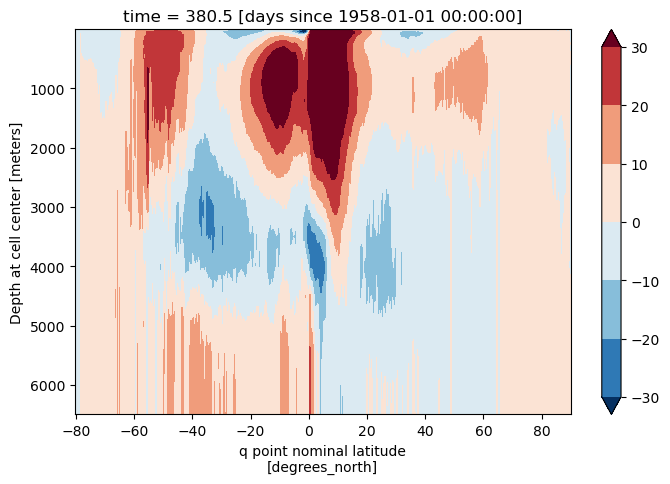

In [17]:
(((ds.vo.isel(time=0) * static.dxCv *dz).sum('xh').cumsum('z_l'))*(1/(10**6))).plot.contourf(cmap='RdBu_r',vmin=-30,vmax=30)
plt.gca().invert_yaxis()

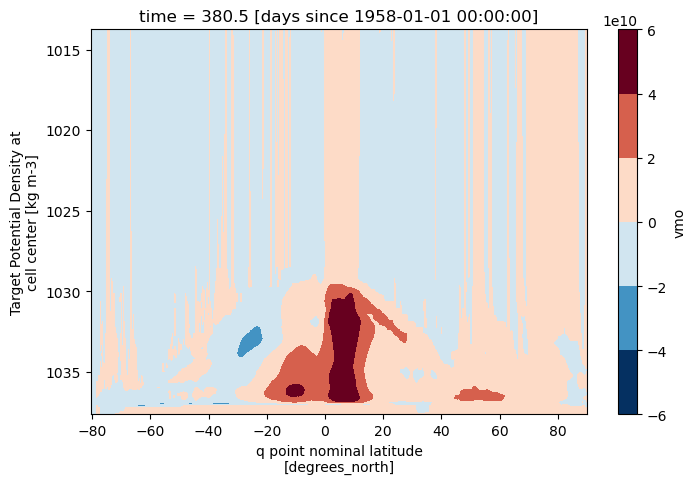

In [14]:
(ds1.vmo.isel(time=0).sum('xh').cumsum('rho2_l')).plot.contourf()
plt.gca().invert_yaxis()